In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


dataB = pd.read_csv('face_landmarks.csv')
data = dataB.drop(dataB.columns[[0, 1]], axis=1)


In [38]:
data.columns

Index(['landmark_0_y', 'landmark_0_z', 'landmark_1_x', 'landmark_1_y',
       'landmark_1_z', 'landmark_2_x', 'landmark_2_y', 'landmark_2_z',
       'landmark_3_x', 'landmark_3_y',
       ...
       'landmark_474_z', 'landmark_475_x', 'landmark_475_y', 'landmark_475_z',
       'landmark_476_x', 'landmark_476_y', 'landmark_476_z', 'landmark_477_x',
       'landmark_477_y', 'landmark_477_z'],
      dtype='object', length=1433)

In [64]:
normalized_data = (data - data.mean()) / data.std()

In [65]:

covariance_matrix = np.cov(normalized_data, rowvar=False)


eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
eigenvalues = np.where(eigenvalues < 1e-10, 0, eigenvalues)

print(eigenvalues)

inertie = eigenvalues / np.sum(eigenvalues) * 100

print("Inertie:", sorted(np.round(inertie, 4).tolist(), reverse=True))



[  0.           0.           0.         ... 156.15407791 480.20271754
 631.3624611 ]
Inertie: [44.0588, 33.5103, 10.897, 4.9408, 4.3838, 1.1599, 0.4986, 0.2168, 0.1429, 0.0402, 0.0321, 0.0255, 0.0191, 0.0113, 0.009, 0.0079, 0.0068, 0.0064, 0.0045, 0.0035, 0.0031, 0.0025, 0.0021, 0.002, 0.0017, 0.0014, 0.0013, 0.0011, 0.001, 0.0009, 0.0008, 0.0007, 0.0006, 0.0006, 0.0005, 0.0005, 0.0004, 0.0004, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

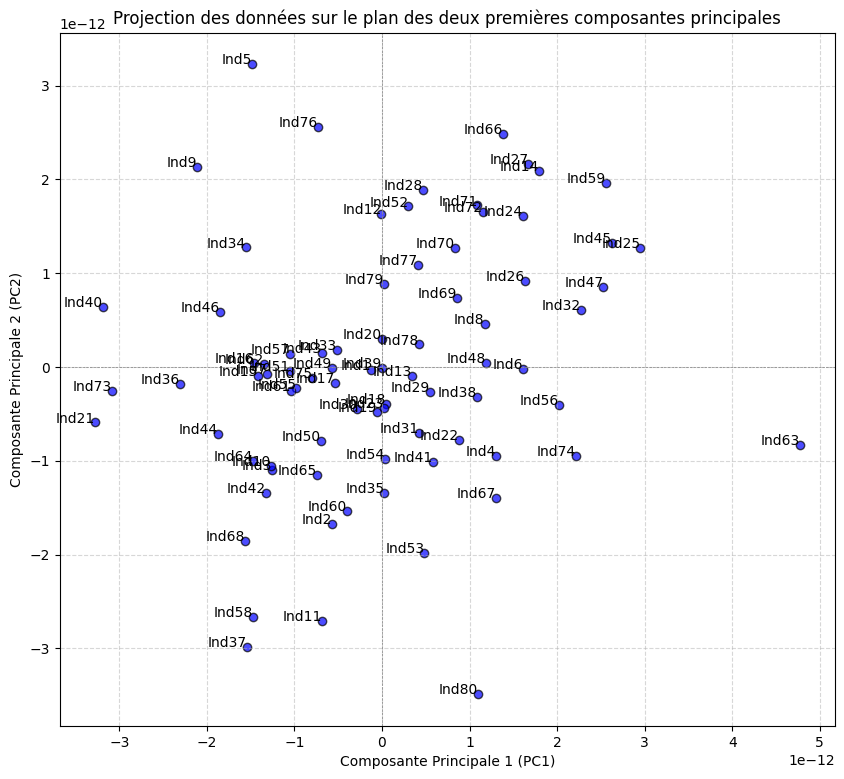

In [66]:


C = np.dot(normalized_data, eigenvectors)
plt.figure(figsize=(10,9))
plt.scatter(C[:, 0], C[:, 1], color='b', alpha=0.7, edgecolors='k')

for i in range(C.shape[0]):
    plt.text(C[i, 0], C[i, 1], f"Ind{i+1}", fontsize=10, ha='right')

plt.xlabel("Composante Principale 1 (PC1)")
plt.ylabel("Composante Principale 2 (PC2)")
plt.title("Projection des données sur le plan des deux premières composantes principales")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

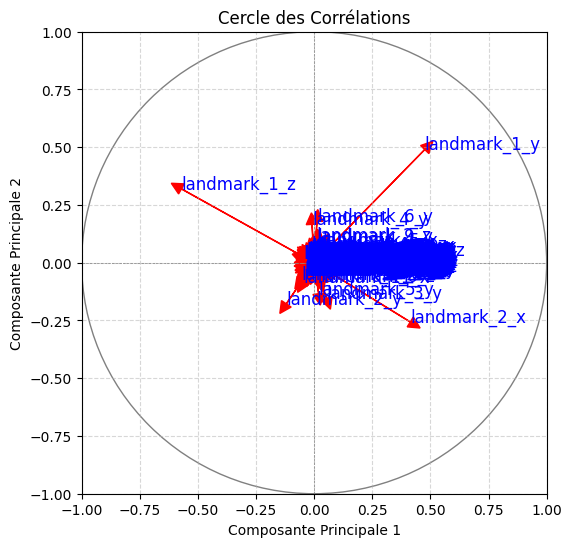

In [63]:
columns = data.columns[2:]

fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.5)

pc1 = eigenvectors[:, 0]
pc2 = eigenvectors[:, 1]

for i in range(min(len(pc1), len(columns))):
    plt.arrow(0, 0, pc1[i], pc2[i], head_width=0.05, head_length=0.05, fc='r', ec='r')
    plt.text(pc1[i], pc2[i], columns[i], fontsize=12, color='blue')

cercle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(cercle)

plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Cercle des Corrélations")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [67]:
projections_1_2 = C[:, :2]
contributions = (projections_1_2 ** 2) * 1/20 / eigenvalues[:2]
contributions *= 100

C:\Users\chems\AppData\Local\Temp\ipykernel_16192\3480205388.py:2: RuntimeWarning: divide by zero encountered in divide
  contributions = (projections_1_2 ** 2) * 1/20 / eigenvalues[:2]


In [52]:
individus = data.index.tolist()

df_contributions = pd.DataFrame(contributions, columns=['Axe 1', 'Axe 2'], index=individus)

In [45]:
moyenne=np.mean(df_contributions,axis=0)

In [50]:
cercle_corr = eigenvectors[:, :2] * np.sqrt(eigenvalues[:2])

C:\Users\chems\AppData\Local\Temp\ipykernel_16192\4080797279.py:1: RuntimeWarning: invalid value encountered in sqrt
  cercle_corr = eigenvectors[:, :2] * np.sqrt(eigenvalues[:2])


In [47]:
df_cercle_corr = pd.DataFrame(cercle_corr[:len(columns)], columns=['Axe 1', 'Axe 2'], index=columns)

In [48]:
contribution_var=df_cercle_corr **2 /eigenvalues[:2]
contribution_var *= 100 
moyenne_var=np.mean(contribution_var,axis=0)
print("moyenne variable \n",moyenne_var)

moyenne variable 
 Axe 1   NaN
Axe 2   NaN
dtype: float64


In [12]:
df_individu_corr = np.dot(normalized_data, eigenvectors[:, :2])


In [13]:
m = df_individu_corr.shape[0]

gamma_i = (1 / m) * ((df_individu_corr ** 2) / eigenvalues[:2])

contribution_ind = pd.DataFrame(gamma_i, columns=[f"Comp {i+1}" for i in range(gamma_i.shape[1])])

In [14]:
moyenne_ind=np.mean(contribution_ind,axis=0)

print("Moyenne des contributions γ_i par composante :\n", moyenne_ind)

Moyenne des contributions γ_i par composante :
 Comp 1    0.0099
Comp 2    0.0099
dtype: float64
